<a href="https://colab.research.google.com/github/doritos0812/Software_LAB_Class/blob/main/04_Pandas_module_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas module

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

We first need to import `pandas` module, with the optional `as pd` (or whatever name you'd like to call by) that declares the alias.

In [ ]:
import pandas as pd

Now you will notice that the following modules go together with you whenever you do something in this class.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In this lecture, we will access data files which are uploaded on the Google drive. In order to do this, we will have to mount the Goodle drive first. 

1) Run the following cell. Then you will be presented with a link and will be asked to enter your authorization code.

2) Click on the link to log in again with your KHU account, which you are working with. Then you will be presented with the authorization code.

3) Copy the authorization code, and paste it into the blank.

> _Note that this step is necessary ONLY when you work on Google Colab environment._


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/ee370')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Data frames

Data frames are the central concept in pandas. In essence, a data frame is table with labeled rows and columns. Data frames can be created from multiple sources - e.g. CSV files, excel files, and JSON.

### Loading data from `csv` files

In [ ]:
df = pd.read_csv('kfxsim.csv', delimiter=',')

Let's first check the size of your file and look at the first 10 rows.

In [ ]:
print(df.shape)   # show the size of the dataframe
df.head(10)       # show the first 10 rows

(2001, 21)


,Time,Position_N,Position_E,Position_D,Flight path angle,Heading angle,Total angle of attack,Bank angle,Ground speed,Lateral acceleration (command),Lateral acceleration (response),Bank angle (command),Bank angle (response),Drag force,Thrust force,Gravitational acceleration,Yaw,Pitch,Roll,Elevation,Azimuth
0,0.00,0.000000,0.000000,-1900.000000,0.000000,2.000000,0.000000,0.000000,250.000000,2.549291,0.000000,-2.870026,0.000000,95310.78504,294359.3750,9.813746,2.000000,0.000000,0.000000,10.764371,-2.000000
1,0.01,2.499138,0.087272,-1899.999509,-0.022467,2.000000,0.011393,-0.013670,250.132068,2.549291,0.002001,-2.863572,-0.013670,95411.51663,292512.7173,9.813746,1.999997,-0.011074,-0.013670,10.755464,-2.003018
2,0.02,4.999589,0.174590,-1899.998039,-0.044817,2.000000,0.044679,-0.052123,250.262882,2.549291,0.007857,-2.857154,-0.052123,95511.35308,290680.6389,9.813746,1.999959,-0.000138,-0.052123,10.767726,-2.010860
3,0.03,7.501341,0.261953,-1899.995597,-0.066948,1.999999,0.098546,-0.111704,250.392451,2.549291,0.017347,-2.850798,-0.111704,95610.30042,288863.0420,9.813746,1.999807,0.031598,-0.111704,10.800058,-2.022806
4,0.04,10.004380,0.349361,-1899.992192,-0.088768,1.999998,0.171725,-0.189039,250.520784,2.549291,0.030260,-2.844532,-0.189039,95708.36436,287059.8356,9.813746,1.999431,0.082956,-0.189039,10.851390,-2.038191
5,0.05,12.508694,0.436813,-1899.987839,-0.110189,1.999994,0.262988,-0.281028,250.647891,2.549291,0.046389,-2.838376,-0.281028,95805.55029,285270.9365,9.813746,1.998704,0.152796,-0.281028,10.920673,-2.056411
6,0.06,15.014271,0.524309,-1899.982557,-0.131129,1.999985,0.371148,-0.384842,250.773781,2.549291,0.065534,-2.832350,-0.384842,95901.86324,283496.2695,9.813746,1.997492,0.240010,-0.384844,11.006891,-2.076919
7,0.07,17.521097,0.611849,-1899.976368,-0.151512,1.999969,0.495060,-0.497913,250.898461,2.549291,0.087500,-2.826471,-0.497913,95997.30790,281735.7675,9.813746,1.995667,0.343529,-0.497920,11.109052,-2.099221
8,0.08,20.029161,0.699430,-1899.969297,-0.171268,1.999943,0.633618,-0.617921,251.021940,2.549291,0.112100,-2.820754,-0.617921,96091.88863,279989.3716,9.813746,1.993110,0.462313,-0.617939,11.226194,-2.122873
9,0.09,22.538451,0.787053,-1899.961371,-0.190330,1.999904,0.785756,-0.742790,251.144224,2.549291,0.139152,-2.815211,-0.742790,96185.60944,278257.0309,9.813746,1.989717,0.595360,-0.742826,11.357385,-2.147483


What does the dataframe contain? You can list all the headers to get the idea.

In [ ]:
list(df)

['Time',
 'Position_N',
 'Position_E',
 'Position_D',
 'Flight path angle',
 'Heading angle',
 'Total angle of attack',
 'Bank angle',
 'Ground speed',
 'Lateral acceleration (command)',
 'Lateral acceleration (response)',
 'Bank angle (command)',
 'Bank angle (response)',
 'Drag force',
 'Thrust force',
 'Gravitational acceleration',
 'Yaw',
 'Pitch',
 'Roll',
 'Elevation',
 'Azimuth']

You can choose some of them and draw plots.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Euler angles')

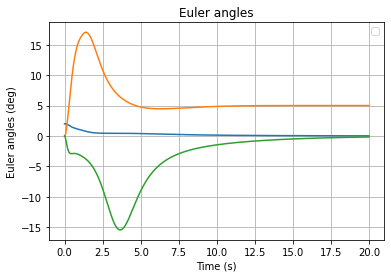

In [ ]:
plt.figure()
plt.plot(df['Time'], df['Yaw'])
plt.plot(df['Time'], df['Pitch'])
plt.plot(df['Time'], df['Roll'])
plt.grid(True)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Euler angles (deg)")
plt.title("Euler angles")

When the data file you are interested in is not on your local machine but on the Internet, you can do something like this. 

In [ ]:
df = pd.read_csv('https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data', delimiter='\t')
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310


These data consist of observations on 442 patients, with the response of interest being a quantitative measure of disease progression one year after baseline, `Y` in 
the last column. 
There are ten baseline variables---age, sex, body-mass index (BMI), average blood pressure (BP), and six blood serum measurements (S1-S6). 

For example, the youngest patient's record can be easily found by,

In [ ]:
df.loc[df['AGE'].idxmin()]

AGE     19.0000
SEX      1.0000
BMI     19.2000
BP      87.0000
S1     124.0000
S2      54.0000
S3      57.0000
S4       2.0000
S5       4.1744
S6      90.0000
Y      137.0000
Name: 26, dtype: float64

Or the average of the BMI over all patients is

In [ ]:
df['BMI'].mean()

26.37579185520364

or

In [ ]:
np.mean(df['BMI'])

26.37579185520364

The correlation between the blood pressure and the body mass index is displayed by

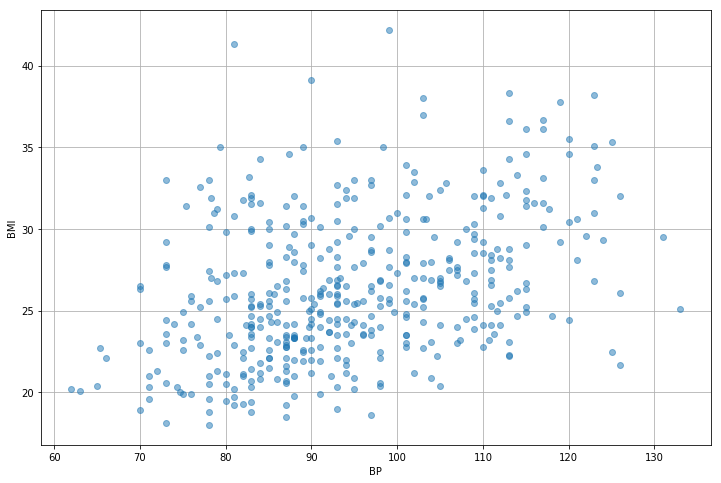

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['BP'], df['BMI'], 'o', alpha=0.5)
plt.xlabel('BP')
plt.ylabel('BMI')
plt.grid(True)

### Loading data from `json` files

`json` files can also be easily imported.

In [ ]:
df = pd.read_json('http://jonghank.github.io/ee370/files/speeches.json')
df

,speeches,parties
0,"Mr. President, I wanted to follow up the remar...",R
1,"Mr. President, I rise today to address a recen...",D
2,"Mr. President, I rise to draw a line — a line ...",D
3,"Mr. President, I rise to condemn in the strong...",D
4,"Mr. President, I thank my colleague and my fri...",R
5,The Senator from Alaska. Mr. MURKOWSKI. I than...,R
6,"Mr. Speaker, along those lines, President Clin...",R
7,Let me give one option that would be put on th...,R
8,"Mr. President, I rise to discuss an issue that...",R
9,"Mr. Speaker, I would like to take this opportu...",R


This `json` file contains 3118 speeches from politicians from two different parties, Republicans (R) and Democrats (D).

If you look inside the first speech, you will see,

In [ ]:
print(f"parties: {df['parties'][0]}")
print(f"speeches: {df['speeches'][0]}")

parties: R
speeches: Mr. President, I wanted to follow up the remarks of my senior Senator from Pennsylvania [Mr. Specter], and talk about the problems that we are having in Pennsylvania today. The first thing I wanted to do was make sure the record is very clear in my use of the word \"liberal.\" I suggested that FEMA be more liberal than what they have been to date, as of early this morning, in declaring counties in Pennsylvania eligible for individual assistance, for emergency disaster relief funds. I think that was an appropriate call given the fact that the Governor of Pennsylvania, who knows a little bit about the Emergency Relief Act that is in place here because he helped write it several years ago and knows it cover to cover, declared 58 of Pennsylvania's 67 counties disaster areas and was seeking Federal grant recognition for, if not all, certainly a great majority of those counties.
Senator Specter, I know, has been traveling the State extensively, as have I. We have seen th

### Loading image files.

The code below loads a `png` image and saves it to a three-dimensional array, `khu`. 

(282, 550, 4)

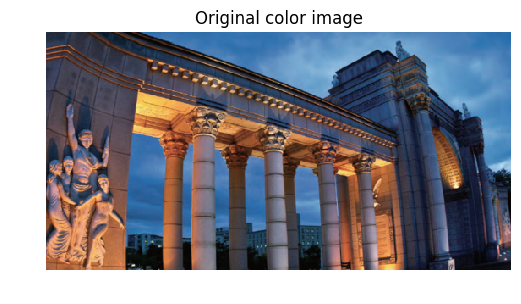

In [ ]:
khu = plt.imread('http://jonghank.github.io/ee370/files/khu_entrance.png')

plt.figure(dpi=100)
plt.imshow(khu)
plt.axis('off')
plt.title('Original color image')

khu.shape

The first two sizes correspond to the image's size, and the last size corresponds to the four channels, the R/G/B, and the Alpha channel. 

The following transforms the original color image to a grayscale one. An easy way to generate a grayscale image from RGB channels is, for each pixel assigning,

$$
G = 0.299 R + 0.587 G + 0.114 B 
$$

Text(0.5, 1.0, 'Grayscale image')

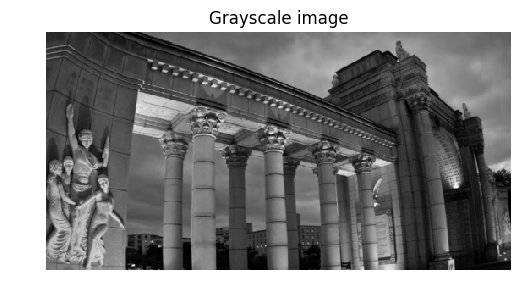

In [ ]:
R_channel = khu[:,:,0]
G_channel = khu[:,:,1]
B_channel = khu[:,:,2]
khu_grayscale = 0.299*R_channel + 0.587*G_channel + 0.114*B_channel

plt.figure(dpi=100)
plt.imshow(khu_grayscale, cmap='gray')
#plt.imshow(B_channel, cmap='gray')
plt.axis('off')
plt.title('Grayscale image')
